# Review Harapan Matematika (Mathematical Expectation)

Pada notebook ini, kita akan membahas konsep harapan matematika yang sangat penting dalam statistika dan machine learning.

## Apa itu Harapan Matematika?

Harapan matematika (mathematical expectation) atau nilai ekspektasi adalah nilai rata-rata yang diharapkan dari suatu variabel acak. Konsep ini sangat fundamental dalam statistika dan machine learning untuk memahami perilaku data dan model.

## Notasi Harapan Matematika

Untuk variabel acak X, harapan matematika dilambangkan sebagai:
- E[X] atau μ
- Untuk variabel acak diskrit: E[X] = Σ x * P(X = x)
- Untuk variabel acak kontinu: E[X] = ∫ x * f(x) dx

## Pentingnya Harapan Matematika dalam Machine Learning

Harapan matematika digunakan dalam:
1. Perhitungan mean dan variance
2. Evaluasi model (expected loss/error)
3. Gradient descent dan optimisasi
4. Probabilistic modeling

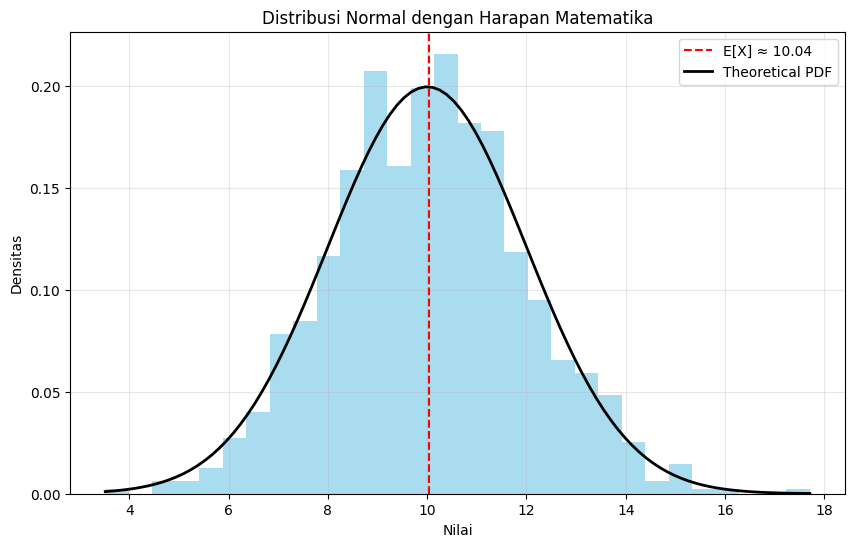

Harapan matematika teoritis: 10.00
Harapan matematika empiris: 10.04


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data
data = np.random.normal(loc=10, scale=2, size=1000)

# Calculate empirical expectation (mean)
empirical_expectation = np.mean(data)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.7, color='skyblue')
plt.axvline(empirical_expectation, color='red', linestyle='--', label=f'E[X] ≈ {empirical_expectation:.2f}')

# Add theoretical normal distribution curve
x = np.linspace(min(data), max(data), 100)
plt.plot(x, stats.norm.pdf(x, loc=10, scale=2), 'k-', lw=2, label='Theoretical PDF')

plt.title('Distribusi Normal dengan Harapan Matematika')
plt.xlabel('Nilai')
plt.ylabel('Densitas')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Harapan matematika teoritis: 10.00")
print(f"Harapan matematika empiris: {empirical_expectation:.2f}")

## Sifat-sifat Harapan Matematika

1. **Linearitas**: 
   - E[aX + b] = aE[X] + b
   - E[X + Y] = E[X] + E[Y]

2. **Variabel Acak Independen**:
   - E[XY] = E[X]E[Y] (jika X dan Y independen)

3. **Non-negativitas**:
   - Jika X ≥ 0, maka E[X] ≥ 0

4. **Monotonisitas**:
   - Jika X ≤ Y, maka E[X] ≤ E[Y]

Mari kita verifikasi beberapa sifat ini dengan contoh:

In [15]:
# Verifikasi sifat linearitas
X = np.random.normal(loc=5, scale=1, size=10000)
a, b = 2, 3

# E[aX + b]
expectation1 = np.mean(a * X + b)
# aE[X] + b
expectation2 = a * np.mean(X) + b

print("Verifikasi Linearitas:")
print(f"E[aX + b] = {expectation1:.4f}")
print(f"aE[X] + b = {expectation2:.4f}")
print(f"Perbedaan: {abs(expectation1 - expectation2):.4f}")

# Verifikasi independensi
Y = np.random.normal(loc=3, scale=1, size=10000)

# E[XY]
expectation_product = np.mean(X * Y)
# E[X]E[Y]
product_expectation = np.mean(X) * np.mean(Y)

print("\nVerifikasi Independensi:")
print(f"E[XY] = {expectation_product:.4f}")
print(f"E[X]E[Y] = {product_expectation:.4f}")
print(f"Perbedaan: {abs(expectation_product - product_expectation):.4f}")

Verifikasi Linearitas:
E[aX + b] = 12.9839
aE[X] + b = 12.9839
Perbedaan: 0.0000

Verifikasi Independensi:
E[XY] = 15.0381
E[X]E[Y] = 15.0437
Perbedaan: 0.0056


## Aplikasi dalam Machine Learning

Harapan matematika memiliki banyak aplikasi penting dalam machine learning:

1. **Loss Function**: Dalam supervised learning, kita meminimalkan expected loss:
   E[L(y, ŷ)] di mana L adalah fungsi loss

2. **Cross-Entropy**: Mengukur perbedaan antara dua distribusi probabilitas:
   H(p,q) = -E[log q(x)] di mana p adalah distribusi sebenarnya

3. **Variance dan Bias**: Dekomposisi error dalam model:
   - Variance = E[(X - E[X])²]
   - Bias = E[ŷ] - y

Mari kita lihat contoh aplikasi dalam konteks regresi linear:

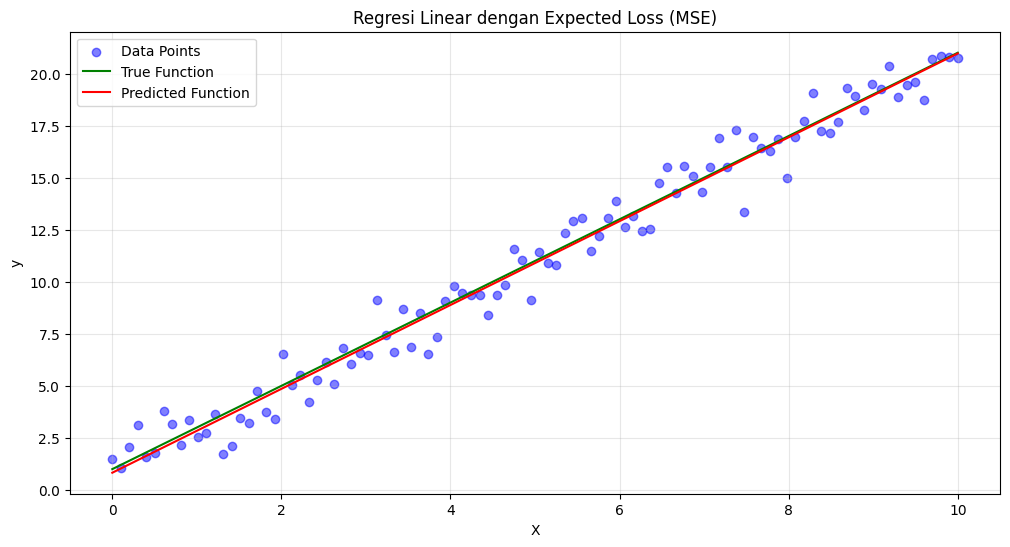

Expected Loss (MSE): 0.8149


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [16]:
# Contoh regresi linear sederhana
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y_true = 2 * X + 1
noise = np.random.normal(0, 1, size=X.shape)
y = y_true + noise

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Calculate expected loss (MSE)
mse = mean_squared_error(y, y_pred)
expected_loss = np.mean((y - y_pred) ** 2)

# Plot results
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')
plt.plot(X, y_true, color='green', label='True Function')
plt.plot(X, y_pred, color='red', label='Predicted Function')
plt.title('Regresi Linear dengan Expected Loss (MSE)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Expected Loss (MSE): {mse:.4f}")
print(f"Koefisien regresi (w): {model.coef_[0]:.4f}")
print(f"Bias (b): {model.intercept_:.4f}")

## Harapan Matematika dalam Konteks Probabilitas Bersyarat

Harapan matematika bersyarat (conditional expectation) E[X|Y] adalah nilai harapan X dengan syarat Y. Ini sangat penting dalam:

1. Prediksi probabilistik
2. Inferensi Bayesian
3. Markov Chain
4. Hidden Markov Models

Mari kita lihat contoh sederhana harapan bersyarat:

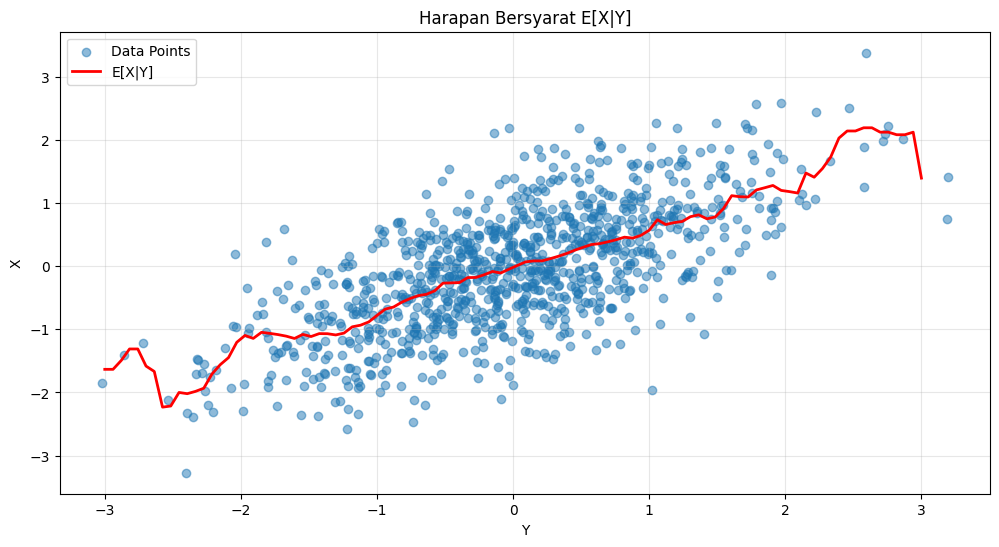

Koefisien korelasi: 0.6714


In [19]:
# Contoh harapan bersyarat
np.random.seed(42)

# Generate bivariate normal data
n = 1000
mean = [0, 0]
cov = [[1, 0.7], 
       [0.7, 1]]
data = np.random.multivariate_normal(mean, cov, n)
X, Y = data[:, 0], data[:, 1]

# Calculate conditional expectations for different y values
y_values = np.linspace(-3, 3, 100)
conditional_expectations = []

for y_val in y_values:
    # Select X values where Y is close to y_val
    mask = np.abs(Y - y_val) < 0.2
    if np.sum(mask) > 0:
        conditional_expectations.append(np.mean(X[mask]))
    else:
        conditional_expectations.append(np.nan)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(Y, X, alpha=0.5, label='Data Points')
plt.plot(y_values, conditional_expectations, 'r-', label='E[X|Y]', linewidth=2)
plt.title('Harapan Bersyarat E[X|Y]')
plt.xlabel('Y')
plt.ylabel('X')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate correlation coefficient
correlation = np.corrcoef(X, Y)[0, 1]
print(f"Koefisien korelasi: {correlation:.4f}")

## Kesimpulan

Dalam notebook ini, kita telah mempelajari:
1. Konsep dasar harapan matematika
2. Sifat-sifat penting harapan matematika
3. Aplikasi dalam machine learning
4. Harapan bersyarat dan korelasinya

Harapan matematika adalah konsep fundamental yang menjadi dasar bagi:
- Estimasi parameter
- Evaluasi model
- Optimisasi
- Inferensi probabilistik

## Latihan

1. Hitung harapan matematika dari distribusi binomial dengan n=10 dan p=0.3
2. Verifikasi sifat linearitas untuk kombinasi tiga variabel acak
3. Implementasikan perhitungan expected loss untuk model klasifikasi logistik
4. Visualisasikan hubungan antara harapan bersyarat dan korelasi untuk berbagai distribusi

Distribusi Binomial:
Harapan matematika teoritis: 3.0
Harapan matematika empiris: 2.9784


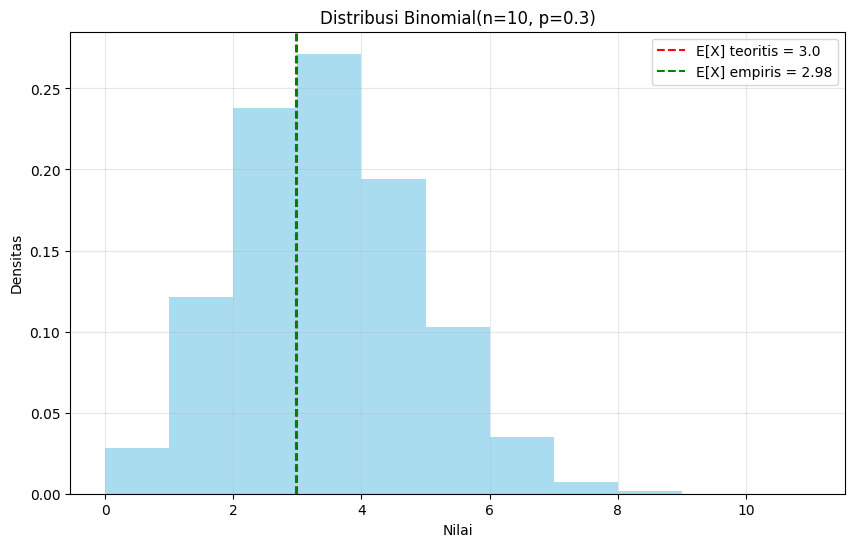

In [21]:
# Latihan 1: Harapan matematika distribusi binomial
n, p = 10, 0.3
X = np.random.binomial(n, p, size=10000)
theoretical_expectation = n * p
empirical_expectation = np.mean(X)

print("Distribusi Binomial:")
print(f"Harapan matematika teoritis: {theoretical_expectation}")
print(f"Harapan matematika empiris: {empirical_expectation:.4f}")

# Visualisasi
plt.figure(figsize=(10, 6))
plt.hist(X, bins=range(n+2), density=True, alpha=0.7, color='skyblue')
plt.axvline(theoretical_expectation, color='red', linestyle='--', 
            label=f'E[X] teoritis = {theoretical_expectation}')
plt.axvline(empirical_expectation, color='green', linestyle='--', 
            label=f'E[X] empiris = {empirical_expectation:.2f}')
plt.title('Distribusi Binomial(n=10, p=0.3)')
plt.xlabel('Nilai')
plt.ylabel('Densitas')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [24]:
# Latihan 2: Verifikasi linearitas untuk tiga variabel
X = np.random.normal(0, 1, 10000)
Y = np.random.normal(2, 1.5, 10000)
Z = np.random.normal(-1, 0.5, 10000)

# Koefisien linear
a, b, c = 2, -1, 3
d = 1.5

# E[aX + bY + cZ + d]
expectation1 = np.mean(a*X + b*Y + c*Z + d)

# aE[X] + bE[Y] + cE[Z] + d
expectation2 = a*np.mean(X) + b*np.mean(Y) + c*np.mean(Z) + d

print("Verifikasi Linearitas untuk Tiga Variabel:")
print(f"E[aX + bY + cZ + d] = {expectation1:.4f}")
print(f"aE[X] + bE[Y] + cE[Z] + d = {expectation2:.4f}")
print(f"Perbedaan: {abs(expectation1 - expectation2):.4f}")

Verifikasi Linearitas untuk Tiga Variabel:
E[aX + bY + cZ + d] = -3.4648
aE[X] + bE[Y] + cE[Z] + d = -3.4648
Perbedaan: 0.0000
